# **Step: 1 Data Exploration and Visualization**


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


**Data Exploration**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Iris.csv')                                 # Reading CSV
# df.info()                                                  # Info of the df
# df.head()                                                  # Retrieve the first 5 rows
print('No. of rows are: ',df.shape[0])                       # No. of Rows
print('No. of columns are: ',df.shape[1])                    # No. of columns
duplicated = df[df.duplicated()]                             # Retrieve the duplicate rows
# # df[(df['SepalLengthCm'] == 4.9) & (df['SepalWidthCm'] == 3.1) & (df['PetalLengthCm'] == 1.5) & (df['PetalWidthCm'] == 0.1)]
# df[(df['SepalLengthCm'] == 5.8) & (df['SepalWidthCm'] == 2.7) & (df['PetalLengthCm'] == 5.1) & (df['PetalWidthCm'] == 1.9)]

df.drop_duplicates(inplace=True)             # Dropping the duplicate rows
# df[df.duplicated()]
df.isnull().sum()                            # Check for null values (if any)
df.columns
df.describe(include='all').round(2)          # Describe the dataset including columns

No. of rows are:  150
No. of columns are:  5


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


**Data Vizualization/Story telling**

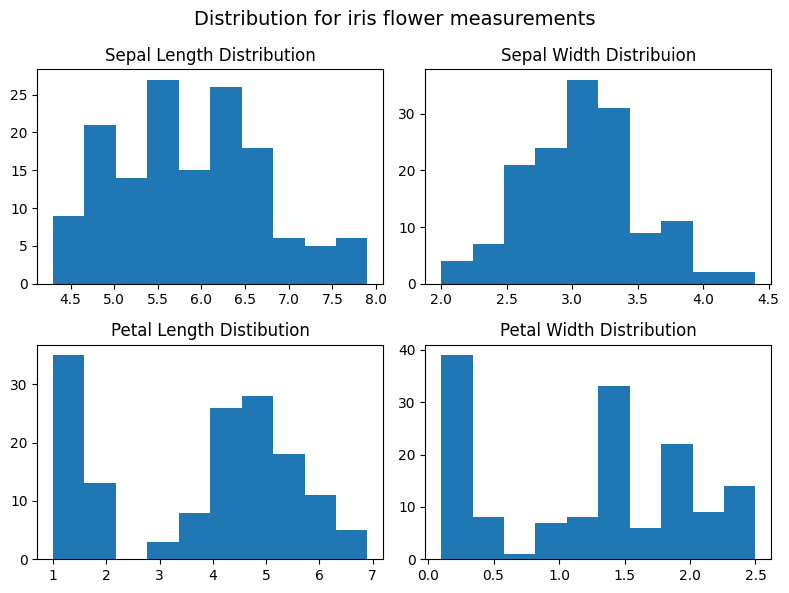

In [3]:
# Histogram visualizations for understanding the relationship between variables (using subplots)
plt.figure(figsize=(8,6))
plt.suptitle('Distribution for iris flower measurements', fontsize=14)

# Creating subplots of 2x2 grid
plt.subplot(2,2,1)
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2,2,2)
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribuion')

plt.subplot(2,2,3)
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distibution')

plt.subplot(2,2,4)
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

*Sepal Length vs Sepal width*

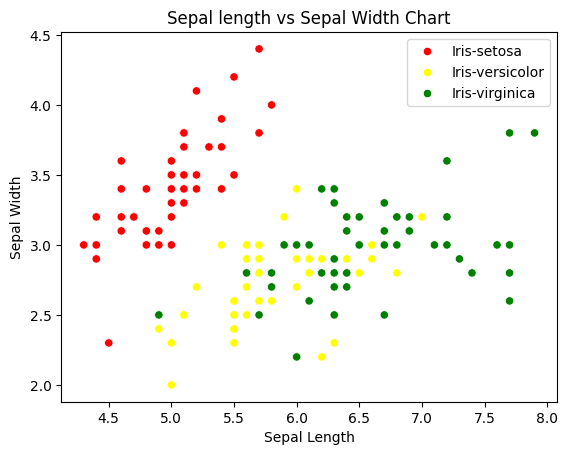

In [4]:
# Define colors for each species and labels for corresponding species
colors = ['red','yellow','green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Scatter plot visualization for Sepal length vs Sepal Width
plt.title('Sepal length vs Sepal Width Chart')
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species', palette=colors)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()

*Petal length vs Petal Width*

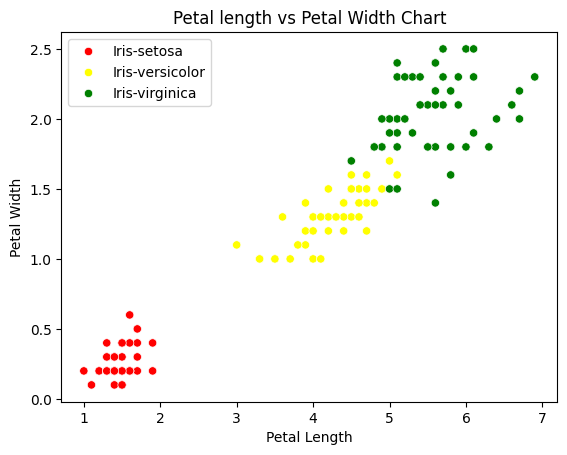

In [5]:
# Scatter plot visualization for Petal length vs Petal Width
plt.title('Petal length vs Petal Width Chart')
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette=colors)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

*Sepal Length vs Petal Length*

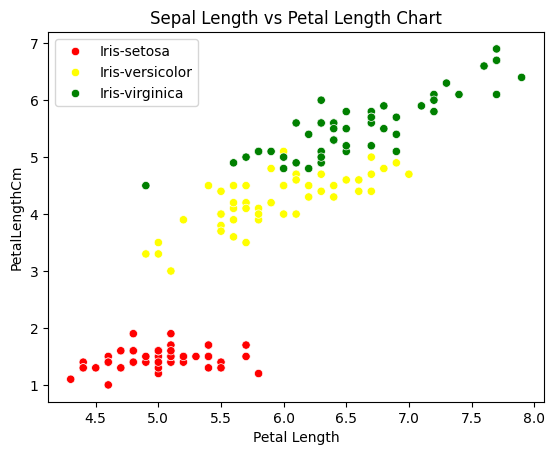

In [6]:
# Scatter plot Visualization for Sepal Length vs Petal Length
plt.title('Sepal Length vs Petal Length Chart')

sns.scatterplot(data=df, x='SepalLengthCm',y='PetalLengthCm',hue='Species',palette=colors)

plt.xlabel('Sepal Length')
plt.xlabel('Petal Length')

plt.legend()
plt.show()

*Sepal Width vs Petal Width*

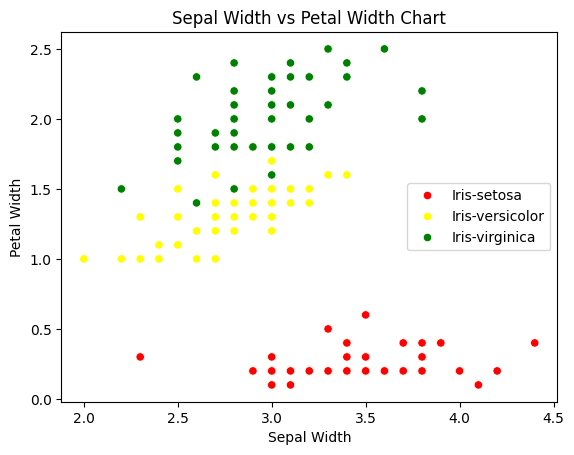

In [7]:
# Scatter plot Visualization for Sepal Width vs Petal Width
plt.title('Sepal Width vs Petal Width Chart')

sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette=colors)

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

*Correlation Heatmap*

In [8]:
# Correlation between the variables
df.iloc[:,:-1].corr()                # Excluding the Species column because it contains "strings"

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


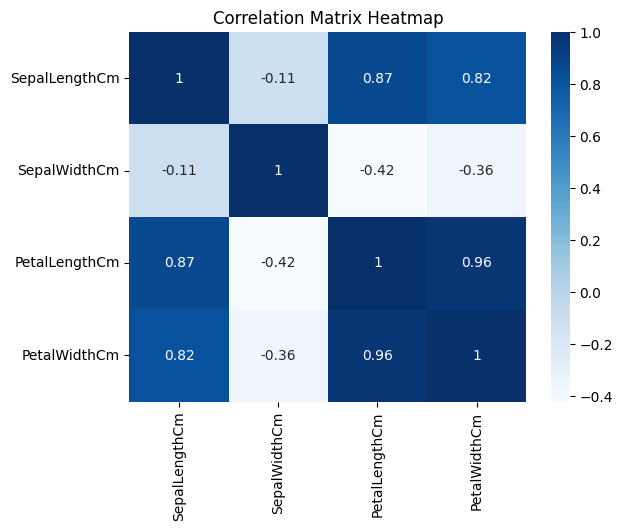

In [9]:
# Correlation Heatmap code
plt.title('Correlation Matrix Heatmap')
matrix_corr = df.iloc[:,:-1].corr()            # or df.corr(numeric_only=True)

sns.heatmap(matrix_corr, annot=True, cmap='Blues')

plt.show()

#**Step: 2 Feature Engineering**

*Categorical Encoding*

In [34]:
# Loading libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [11]:
le = LabelEncoder()                         # Creating le object
# Encode Species column to convert categorical names into numerical labels
df['Species'] = le.fit_transform(df['Species'])

unique_species = df['Species'].unique()

print('Unique Species values: ',unique_species)     # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Unique Species values:  [0 1 2]


*Data Splitting*

In [12]:
X = df.iloc[:,:-1]                                   # Dependent Variables
y = df['Species']                                    # Inependent Variables

# Splitting dataset into two parts to perform training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Step 3: Model Building**

# ML Model 1: K-Nearest Neighbors (KNN)

**1) Evaluation Metric Score Chart**

Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



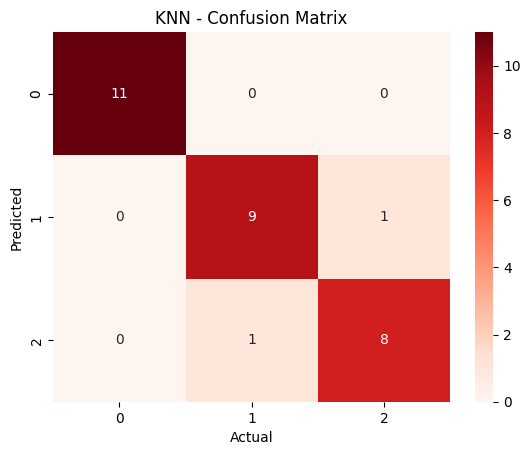

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Object Creation
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(X_train, y_train)
# Predict
y_pred_knn = knn.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d',cmap='Reds')

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('KNN - Confusion Matrix')
plt.show()

**2) Cross-Validation & Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':[1,3,5,7]}
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)
grid_knn.fit(X,y)

print('Best Parameters:',grid_knn.best_params_)
print('Best CV Score:',grid_knn.best_score_)

Best Parameters: {'n_neighbors': 7}
Best CV Score: 0.9795402298850575


# ML Model 2: Decision Trees

**1) Evaluation Metric Score Chart**

Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



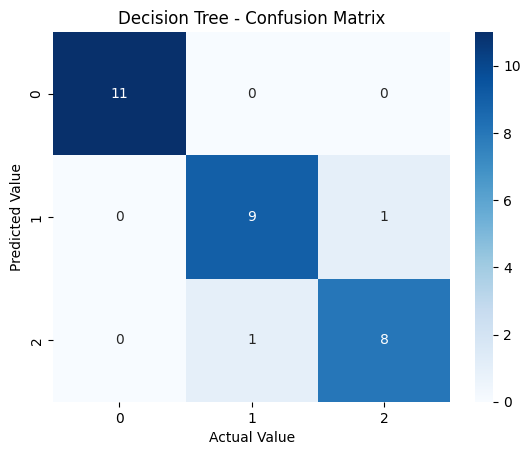

In [18]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=0)              # Implementation of a model with some randomness to maintain reproducibility

d_tree.fit(X_train,y_train)                                  # Training Decision Tree with training data (X_train for features and y_train for labels)
y_pred_tree = d_tree.predict(X_test)                         # Stores the predicted class labels

print('Accuracy: ',accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Heatmap of confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred_tree), annot=True, fmt='d', cmap='Blues')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.title('Decision Tree - Confusion Matrix')
plt.show()

**2) Cross-Validation & Tuning**

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,3,4,5,6]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(X,y)

print('Best Parameters:',grid_tree.best_params_)
print('Best CV Score:',grid_tree.best_score_)

Best Parameters: {'max_depth': 5}
Best CV Score: 0.9659770114942529


# ML Model 3: Random Forest

**1) Evaluation Metric Score Chart**


Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



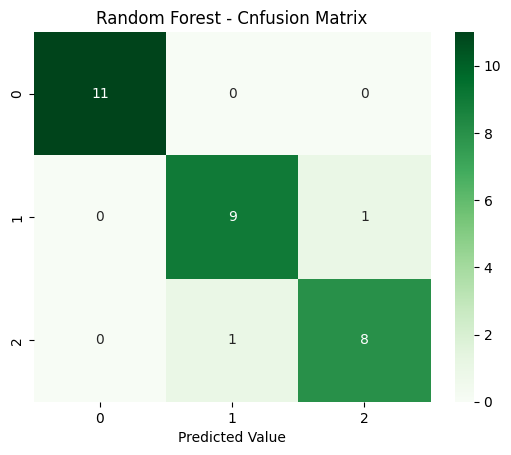

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)                                       # Object Creation
rf.fit(X_train,y_train)                                                           # Train
y_pred_rf = rf.predict(X_test)                                                    # Predict

print('Accuracy: ',accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

# Heatmap for Confusion matrix - Random Forest

sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Greens')

plt.xlabel('Actual Value')
plt.xlabel('Predicted Value')

plt.title('Random Forest - Cnfusion Matrix')
plt.show()

**2) Cross-Validation & Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,50,100],'max_depth':[2,4,6]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rf.fit(X,y)

print('Best Parameters: ',grid_rf.best_params_)
print('Best CV Score: ',grid_rf.best_score_)

Best Parameters:  {'max_depth': 4, 'n_estimators': 10}
Best CV Score:  0.9659770114942529


# ML Model 4: Logistic Regression

**1) Evaluation Metric Score Chart**


Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



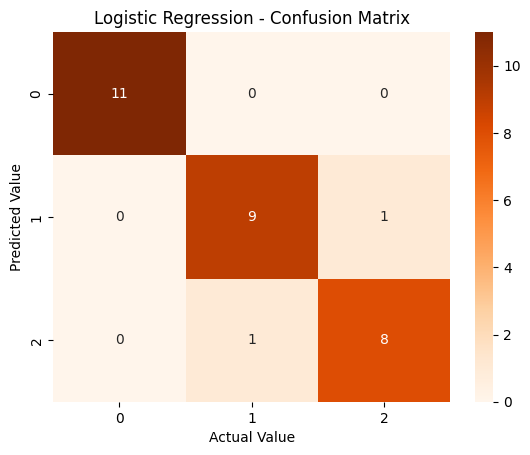

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)                  # Object Creation
logreg.fit(X_train, y_train)                   # Train
y_pred_logreg = logreg.predict(X_test)        # Predict

print('Accuracy: ',accuracy_score(y_test,y_pred_logreg))
report = classification_report(y_test, y_pred_logreg)
print(report)

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Oranges')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.title('Logistic Regression - Confusion Matrix')
plt.show()

**2) Cross-Validation & Tuning**

In [41]:
cv_scores = cross_val_score(logreg, X, y, cv=5)
print('Cross Validation Scores: ',cv_scores)
print('Average CV Scores: ',cv_scores.mean())


Cross Validation Scores:  [0.96666667 0.96666667 0.93103448 0.93103448 1.        ]
Average CV Scores:  0.9590804597701149


# ML Model 5: Support Vector Machines (SVM)

**1) Evaluation Metrics Score Chart**

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



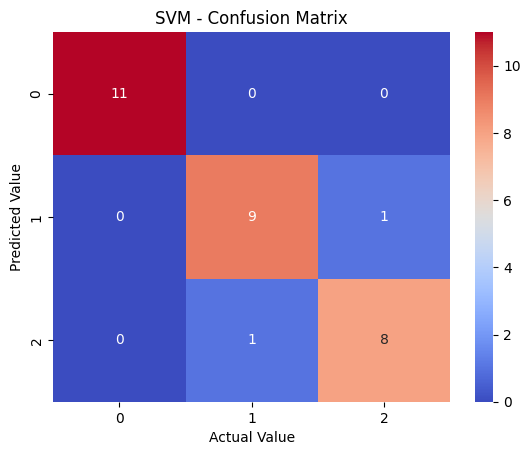

In [50]:
from sklearn.svm import SVC
# Create model
svm_model = SVC(kernel='rbf', C=1.0)                # rbf - radial basis function
svm_model.fit(X_train, y_train)                     # Train

y_pred_svm = svm_model.predict(X_test)              # Predict

print('Accuracy:',accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='d',cmap='coolwarm')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.title('SVM - Confusion Matrix')
plt.show()

**2) Cross-Validation & Tuning**

In [51]:
cv_svm = cross_val_score(SVC(kernel='rbf', C=1.0), X, y, cv=5)
print("SVM CV Scores:", cv_svm)
print("SVM Average CV Score:", cv_svm.mean())

SVM CV Scores: [0.96666667 0.96666667 0.96551724 0.89655172 1.        ]
SVM Average CV Score: 0.9590804597701149


# Cross-Validation Comparison of All Models

In [55]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

cv_scores = {}

# Cross-Validate each model
for name, model in models.items():
  scores = cross_val_score(model, X, y, cv=5)
  cv_scores[name] = scores.mean()
  print(f'{name} CV Score: {scores.mean():.4f}')

KNN CV Score: 0.9726
Decision Tree CV Score: 0.9591
Random Forest CV Score: 0.9522
Logistic Regression CV Score: 0.9591
SVM CV Score: 0.9591


**Plot Score Comparison**

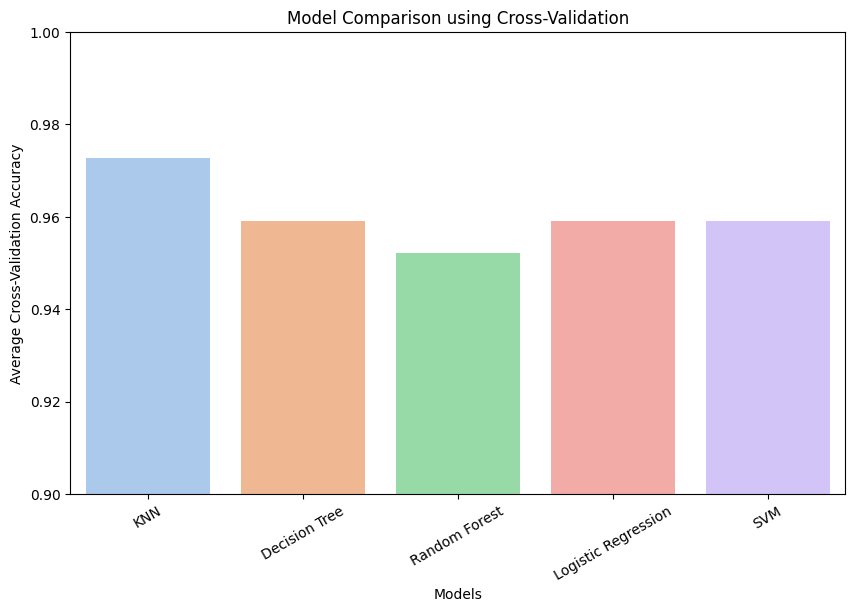

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_scores.keys()),
            y=list(cv_scores.values()),
            hue = list(cv_scores.keys()),
            palette="pastel",
            legend=False)
plt.xlabel('Models')
plt.ylabel("Average Cross-Validation Accuracy")
plt.title("Model Comparison using Cross-Validation")
plt.ylim(0.90, 1.00)
plt.xticks(rotation=30)
plt.show()

#**Conclusion Summary:**

In this project, we successfully built and evaluated multiple machine learning models for the Iris Classification problem using the popular Iris dataset.

**Key Steps Completed:**

Performed detailed data exploration and visualization, including histograms, scatter plots, box plots, pairplots, and heatmaps to understand feature relationships.

Preprocessed the dataset by handling duplicates, encoding the target variable, and standardizing features.

**Trained and evaluated five different ML models:**

- Logistic Regression

- Decision Tree

- Random Forest

- K-Nearest Neighbors (KNN)

- Support Vector Machine (SVM)

Used confusion matrix, precision, recall, and f1-score to evaluate model performance.

Applied cross-validation to ensure model generalization.

Performed hyperparameter tuning using GridSearchCV for selected models.

**Best Performing Model:**

K-Nearest Neighbors (KNN) - **Highest Cross-Validation Score: 0.9726**

Simple yet effective for small, well-structured datasets like Iris

Performs well after scaling features

**Conclusion:**

**The KNN model** provided the best balance of accuracy and simplicity, making it the most suitable choice for this classification task. This project demonstrates a solid understanding of machine learning workflows from data analysis to model tuning and evaluation.